## **IMPORTAR LIBRERIAS**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Input
from flask import Flask, request, jsonify
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os
from collections.abc import Sequence


2024-08-21 23:16:41.638446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## ** Realiza un análisis exploratorio para entender la estructura y contenido de los datos**

In [10]:
#carga  archivo data_proyecto.csv en un DataFrame de pandas
data = pd.read_csv ("../estudio_caso_IA/data_proyecto.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
data.describe()

,39,77516,13,2174,0,40
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
data.head(3)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [14]:
# Asignar nombres a las columnas
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary']

In [15]:
# Mostrar las primeras cinco filas del dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Manejo de valores faltantes:
#se opta por eliminar o imputar los valores nulos según la estrategia 
#más adecuada para el modelo

In [16]:
data.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

<Axes: >

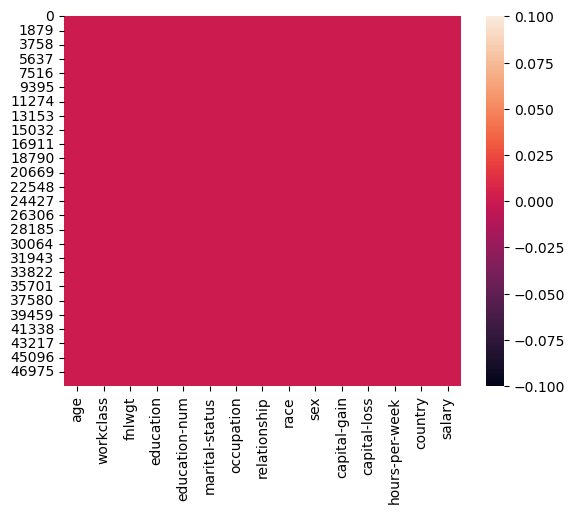

In [17]:
sns.heatmap(data.isna())

<Axes: xlabel='race', ylabel='count'>

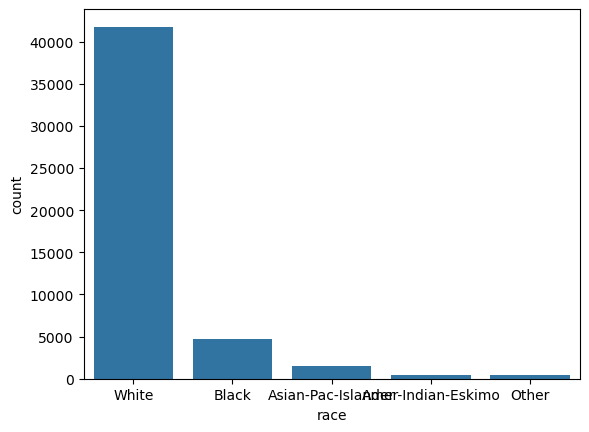

In [18]:
sns.countplot(x="race", data= data)

<Axes: xlabel='race', ylabel='count'>

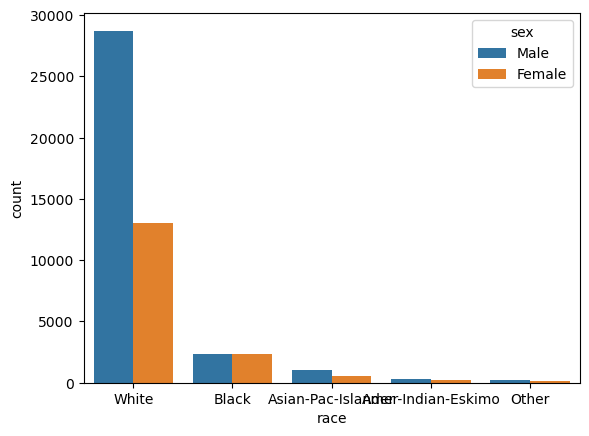

In [19]:
sns.countplot(x="race", data= data, hue="sex")

<Axes: xlabel='race', ylabel='count'>

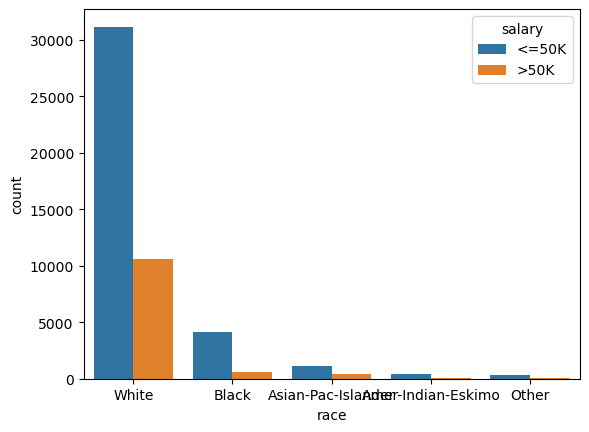

In [20]:
sns.countplot(x="race", data= data, hue="salary")

<Axes: ylabel='Frequency'>

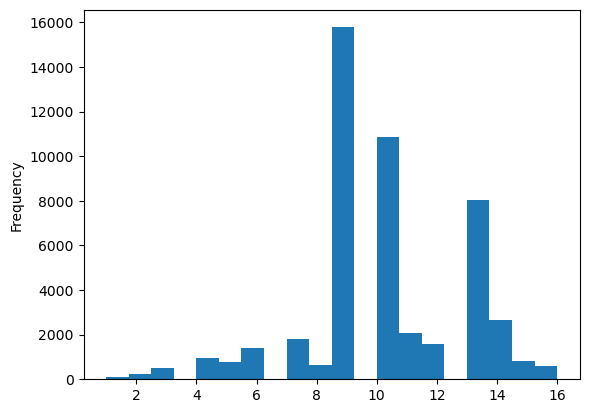

In [21]:
data["education-num"].plot.hist(bins=20)

## **LIMPIEZA**

<Axes: xlabel='salary', ylabel='age'>

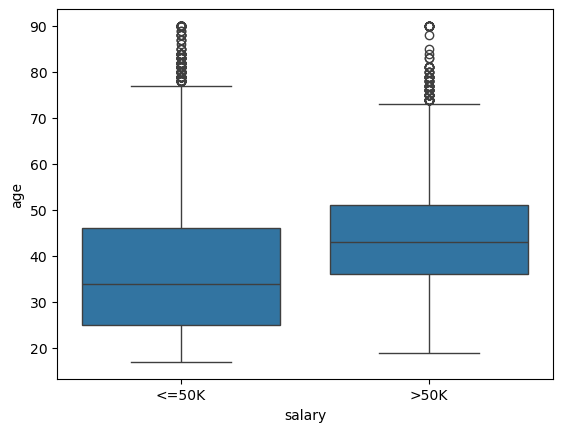

In [22]:
sns.boxplot(x="salary", y="age", data=data)

In [23]:
def calcularEdad(columnas):
    edad = columnas.iloc[0]
    clases = columnas.iloc[1]
    if pd.isnull (edad):
        if clases == 1:
            return 38
        elif clases == 2:
            return 29
        else:
            return 25
    else:
        return edad

<Axes: >

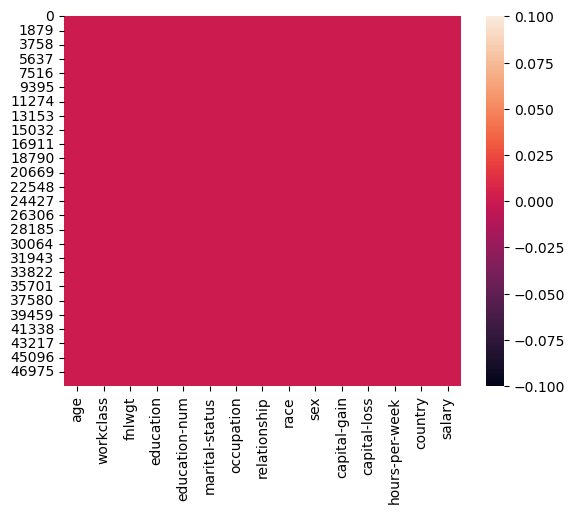

In [24]:
data["age"] = data[["age","salary"]].apply(calcularEdad, axis=1)
sns.heatmap(data.isna())

In [25]:
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'country'], axis=1, inplace=True)
data.head()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,50,83311,13,White,Male,0,0,13,<=50K
1,38,215646,9,White,Male,0,0,40,<=50K
2,53,234721,7,Black,Male,0,0,40,<=50K
3,28,338409,13,Black,Female,0,0,40,<=50K
4,37,284582,14,White,Female,0,0,40,<=50K


In [26]:
sexo = pd.get_dummies(data["sex"], drop_first = True)

In [27]:
data = pd.concat([data,sexo], axis=1)
data

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,salary,Male
0,50,83311,13,White,Male,0,0,13,<=50K,True
1,38,215646,9,White,Male,0,0,40,<=50K,True
2,53,234721,7,Black,Male,0,0,40,<=50K,True
3,28,338409,13,Black,Female,0,0,40,<=50K,False
4,37,284582,14,White,Female,0,0,40,<=50K,False
...,...,...,...,...,...,...,...,...,...,...
48836,39,215419,13,White,Female,0,0,36,<=50K,False
48837,64,321403,9,Black,Male,0,0,40,<=50K,True
48838,38,374983,13,White,Male,0,0,50,<=50K,True
48839,44,83891,13,Asian-Pac-Islander,Male,5455,0,40,<=50K,True


In [28]:
data.drop('sex', axis=1, inplace=True)
data.head()

,age,fnlwgt,education-num,race,capital-gain,capital-loss,hours-per-week,salary,Male
0,50,83311,13,White,0,0,13,<=50K,True
1,38,215646,9,White,0,0,40,<=50K,True
2,53,234721,7,Black,0,0,40,<=50K,True
3,28,338409,13,Black,0,0,40,<=50K,False
4,37,284582,14,White,0,0,40,<=50K,False


In [29]:
data=data.rename(columns={"male":"sex"})

In [30]:
puerto = pd.get_dummies(data["race"], drop_first = True)

In [31]:
data = pd.concat([data,puerto], axis=1)
data

,age,fnlwgt,education-num,race,capital-gain,capital-loss,hours-per-week,salary,Male,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,White,0,0,13,<=50K,True,False,False,False,True
1,38,215646,9,White,0,0,40,<=50K,True,False,False,False,True
2,53,234721,7,Black,0,0,40,<=50K,True,False,True,False,False
3,28,338409,13,Black,0,0,40,<=50K,False,False,True,False,False
4,37,284582,14,White,0,0,40,<=50K,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,215419,13,White,0,0,36,<=50K,False,False,False,False,True
48837,64,321403,9,Black,0,0,40,<=50K,True,False,True,False,False
48838,38,374983,13,White,0,0,50,<=50K,True,False,False,False,True
48839,44,83891,13,Asian-Pac-Islander,5455,0,40,<=50K,True,True,False,False,False


In [32]:
data.drop('race', axis=1, inplace=True)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,Male,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,0,0,13,<=50K,True,False,False,False,True
1,38,215646,9,0,0,40,<=50K,True,False,False,False,True
2,53,234721,7,0,0,40,<=50K,True,False,True,False,False
3,28,338409,13,0,0,40,<=50K,False,False,True,False,False
4,37,284582,14,0,0,40,<=50K,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,215419,13,0,0,36,<=50K,False,False,False,False,True
48837,64,321403,9,0,0,40,<=50K,True,False,True,False,False
48838,38,374983,13,0,0,50,<=50K,True,False,False,False,True
48839,44,83891,13,5455,0,40,<=50K,True,True,False,False,False


## **CLASIFICAR**

In [33]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
# Assuming 'y' is your target variable and contains '>50K' and '<=50K'
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now proceed with scaling the features (x_train and x_test)
from sklearn.preprocessing import StandardScaler

# Iterate through columns in x_train to find and encode string columns
for col_index in range(x_train.shape[1]):
    if isinstance(x_train[0, col_index], str):  # Check if the column contains strings
        label_encoder_x = LabelEncoder()
        x_train[:, col_index] = label_encoder_x.fit_transform(x_train[:, col_index])
        x_test[:, col_index] = label_encoder_x.transform(x_test[:, col_index])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
# Crear el modelo de red neuronal simple
modelo = Sequential()
modelo.add(Input(shape=(x_train.shape[1],)))
modelo.add(Dense(12, activation="relu"))
modelo.add(Dense(8, activation="relu"))# Capa oculta
modelo.add(Dense(1, activation="sigmoid"))# Capa de salida (para clasificación binaria)

In [37]:
# Compilamos el modelo
modelo.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [38]:
historial = modelo.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.0171 - loss: -27473.0898
Epoch 2/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0187 - loss: -715592.3125
Epoch 3/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0175 - loss: -2977939.0000
Epoch 4/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0172 - loss: -7465279.5000
Epoch 5/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.0181 - loss: -14706069.0000
Epoch 6/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0177 - loss: -25099440.0000
Epoch 7/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0174 - loss: -39892788.0000
Epoch 8/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0172 - loss: -59275340.0000
Epoch 9/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0184 - loss: -82835600.0000
Epoch 10/10
3908/3908 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0191 - loss: -112435368.0000


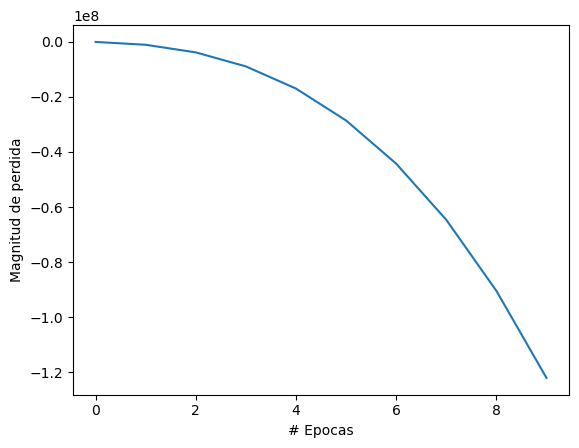

In [39]:
plt.xlabel("# Epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [40]:
modelo.evaluate(x_test, y_test)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.0173 - loss: -137774256.0000


[-139935920.0, 0.01648070476949215]

In [41]:
# Evaluamos el modelo
y_pred = modelo.predict(x_test)
y_pred_df = pd.DataFrame(np.round(y_pred), columns = ["Estimacion"])

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
estimar = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test), y_pred_df], axis=1)
estimar

,0,1,2,3,4,5,6,7,8,9,10,0,Estimacion
0,-0.303283,-0.423137,-0.145323,-0.217935,-0.683770,-0.562138,-1.419442,-0.178768,-0.324532,-0.092292,0.410647,28,1.0
1,0.103748,-0.423137,-0.145323,-0.217935,-0.035775,-0.562138,-1.419442,-0.178768,3.081357,-0.092292,-2.435183,11,1.0
2,-0.244785,-0.423137,-0.145323,-0.217935,-0.035775,-0.562138,0.704502,-0.178768,-0.324532,-0.092292,0.410647,4,1.0
3,-1.562372,-0.033800,-0.145323,-0.217935,-0.035775,-0.562138,-1.419442,-0.178768,-0.324532,-0.092292,0.410647,4,1.0
4,0.058843,2.302221,-0.145323,-0.217935,0.369222,1.778924,0.704502,-0.178768,-0.324532,-0.092292,0.410647,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.321796,-0.423137,-0.145323,-0.217935,0.612220,-0.562138,-1.419442,-0.178768,-0.324532,-0.092292,0.410647,35,1.0
9765,0.039605,-0.033800,-0.145323,-0.217935,1.179216,-0.562138,0.704502,-0.178768,3.081357,-0.092292,-2.435183,21,1.0
9766,-1.539198,-0.423137,-0.145323,-0.217935,-0.035775,-0.562138,-1.419442,-0.178768,-0.324532,-0.092292,0.410647,19,1.0
9767,-1.495699,-0.423137,-0.145323,-0.217935,1.989210,-0.562138,0.704502,-0.178768,-0.324532,-0.092292,0.410647,51,1.0


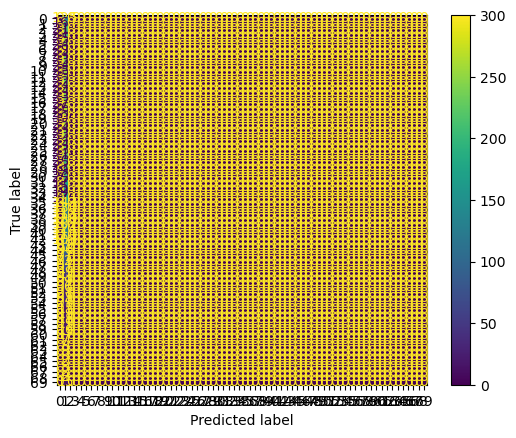

In [43]:
matrix = ConfusionMatrixDisplay(confusion_matrix(pd.DataFrame(y_test), y_pred_df))
matrix.plot()

In [44]:
print(classification_report(y_test, y_pred_df))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.02      1.00      0.03       161
           2       0.00      0.00      0.00       214
           3       0.00      0.00      0.00       212
           4       0.00      0.00      0.00       259
           5       0.00      0.00      0.00       245
           6       0.00      0.00      0.00       294
           7       0.00      0.00      0.00       242
           8       0.00      0.00      0.00       238
           9       0.00      0.00      0.00       242
          10       0.00      0.00      0.00       254
          11       0.00      0.00      0.00       254
          12       0.00      0.00      0.00       227
          13       0.00      0.00      0.00       241
          14       0.00      0.00      0.00       248
          15       0.00      0.00      0.00       231
          16       0.00      0.00      0.00       273
          17       0.00    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
# Crear el modelo de red neuronal multicapa
#Ahora crearemos una red con múltiples capas ocultas:
model_multilayer = Sequential()
model_multilayer.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Primera capa oculta
model_multilayer.add(Dense(32, activation='relu'))  # Segunda capa oculta
model_multilayer.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model_multilayer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_multilayer.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluar el modelo
y_pred_multilayer = (model_multilayer.predict(X_test) > 0.5).astype("int32")
accuracy_multilayer = accuracy_score(y_test, y_pred_multilayer)
print(f'Exactitud: {accuracy_multilayer:.4f}')


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3430 - loss: 0.3476 - val_accuracy: 0.2889 - val_loss: 0.0183
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3947 - loss: -0.3941 - val_accuracy: 0.2889 - val_loss: -0.3563
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4294 - loss: -1.1212 - val_accuracy: 0.2889 - val_loss: -0.6699
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3393 - loss: -1.5195 - val_accuracy: 0.2889 - val_loss: -1.0248
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3765 - loss: -1.6711 - val_accuracy: 0.2889 - val_loss: -1.4253
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3916 - loss: -2.6879 - val_accuracy: 0.2889 - val_loss: -1.8974
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3974 - loss: -2.6028 - val_accuracy: 0.2889 - val_loss: -2.5113
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3580 - loss: -3.8541 - val_accuracy: 0.2889 - val_lo

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3294 - loss: -677.9836 - val_accuracy: 0.2889 - val_loss: -478.2778
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Exactitud: 0.2889


In [52]:
#Implementación de SVM con Diferentes Kernels
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Crear un diccionario para almacenar los resultados
results = {}

# Kernel Lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
results['Linear'] = accuracy_score(y_test, y_pred_linear)

# Kernel Polinomial
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
results['Polynomial'] = accuracy_score(y_test, y_pred_poly)

# Kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
results['RBF'] = accuracy_score(y_test, y_pred_rbf)

# Kernel Sigmoidal
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
results['Sigmoid'] = accuracy_score(y_test, y_pred_sigmoid)

# Mostrar los resultados
for kernel, accuracy in results.items():
    print(f'Kernel: {kernel}, Exactitud: {accuracy:.4f}')


Kernel: Linear, Exactitud: 1.0000
Kernel: Polynomial, Exactitud: 0.9778
Kernel: RBF, Exactitud: 1.0000
Kernel: Sigmoid, Exactitud: 0.2222


In [ ]:
##Despliegue Local del Mejor Modelo

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

# Se cargar datos de data_proyecto.csv
data = load_iris()
X = data.data
y = data.target

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Guardamos el modelo con el nombre asignado
joblib.dump(model, 'mejor_modelo.pkl')


['mejor_modelo.pkl']

In [56]:
#Despliegue Local con Flask e instalacion

In [57]:
pip install flask joblib

Note: you may need to restart the kernel to use updated packages.


In [58]:
import joblib

# Determinamos que 'model' es nuestro modelo entrenado
joblib.dump(model, 'mejor_modelo.pkl')


['mejor_modelo.pkl']

In [59]:

# Se crear un diccionario para almacenar los resultados
results = {}

In [60]:
joblib.dump(model, '../estudio_caso_IA/mejor_modelo.pkl')


['../estudio_caso_IA/mejor_modelo.pkl']

In [61]:
import joblib

# Cargar el modelo desde el archivo .pkl
model = joblib.load('mejor_modelo.pkl')

# Ahora puedes usar el modelo para hacer predicciones o cualquier otra tarea


In [62]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Cargar el modelo
model = joblib.load('mejor_modelo.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['input']])
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True,port=6000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:6000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [63]:

import os
print(os.listdir('.'))  # Imprime la Lista de los archivos en el directorio actual

['CAPA_SIMPLE.ipynb', '~$oyecto en grupo.docx', '.DS_Store', 'requirements.txt', 'estudio de caso.ipynb', 'CAPA_SVM.ipynb', 'app.py', '.ipynb_checkpoints', 'Capa_Multicapa.ipynb', 'data_proyecto.csv', '.git', 'mejor_modelo.pkl']


In [64]:
import joblib

# Cargar el modelo
model = joblib.load('mejor_modelo.pkl')

# Ejemplo de datos de entrada
nuevos_datos = [[5.1, 3.5, 1.4, 0.2]]  # para verificar Cambiamos estos datos  por los  que se quiera predecir

# Hacer predicciones
predicciones = model.predict(nuevos_datos)

# Mostrar el resultado
print('Predicción:', predicciones)


Predicción: [0]


In [65]:
# Ejemplo de datos de entrada
nuevos_datos = [[6.4, 2.5, 4.4, 0.3]]  # Sustituimos

# Realizamos predicciones con el modelo cargado
predicciones = model.predict(nuevos_datos)

# Mostrar las predicciones
print(predicciones)


[1]


In [66]:
# Ejemplo de datos de entrada
nuevos_datos = [[63.4, 23.5, 44.4, 0.8]]  # Sustituimos esto con datos reales 

# predicciones con el modelo cargado
predicciones = model.predict(nuevos_datos)

# Muestra las predicciones
print(predicciones)


[2]


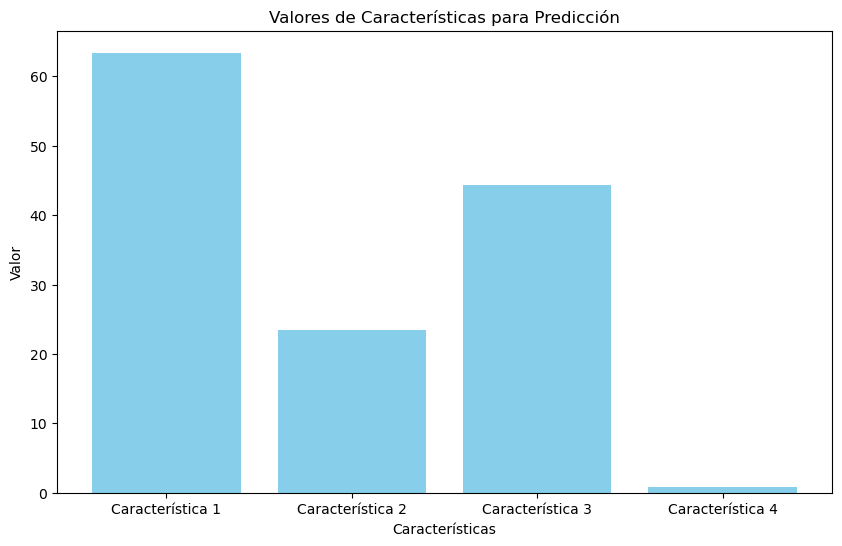

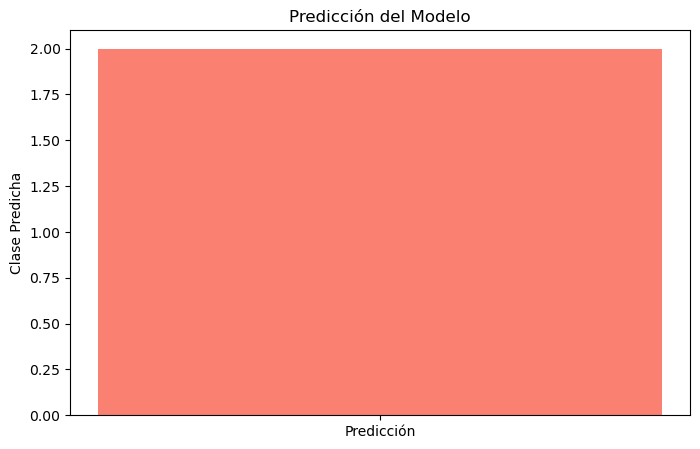

In [67]:
# Ejemplo de datos para el gráfico
# Los 'nuevos_datos' tiene 4 características y queremos ver su clasificación
caracteristicas = ['Característica 1', 'Característica 2', 'Característica 3', 'Característica 4']
valores = nuevos_datos[0]  # Tomamos la primera (y única) fila de 'nuevos_datos'

# Se crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(caracteristicas, valores, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.title('Valores de Características para Predicción')
plt.show()

# gráfico de barras para las predicciones
plt.figure(figsize=(8, 5))
plt.bar(['Predicción'], [predicciones[0]], color='salmon')
plt.ylabel('Clase Predicha')
plt.title('Predicción del Modelo')
plt.show()


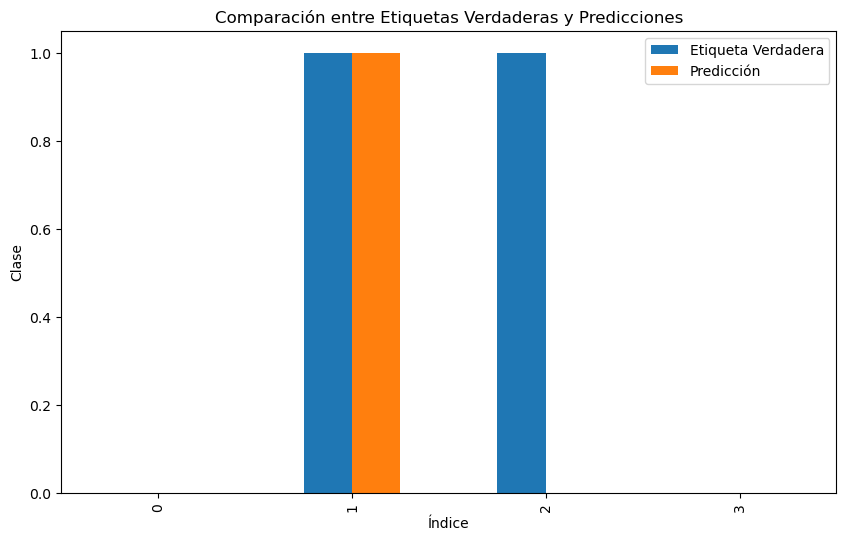

In [68]:
import pandas as pd

# Ejemplo de datos de prueba (esto sería un DataFrame con las predicciones)
# Se tienes las etiquetas verdaderas y predicciones
etiquetas_verdaderas = np.array([0, 1, 1, 0])  # Reemplazado con los datos
predicciones = np.array([0, 1, 0, 0])  # Reemplazado con los datos

# Crear un DataFrame para facilitar la visualización
df_resultados = pd.DataFrame({
    'Etiqueta Verdadera': etiquetas_verdaderas,
    'Predicción': predicciones
})

# gráfico de barras comparativo
df_resultados.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación entre Etiquetas Verdaderas y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.show()


In [69]:
pip install flask joblib


Note: you may need to restart the kernel to use updated packages.
